<hr>
<p style="text-align:left;">
    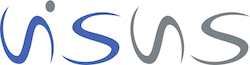
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-12-01
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 07
Responsible tutor: Isha Sharma
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-12-08, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-12-12</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 7.1 (6 points)


Given is the hyperbolic, partial differential equation $\frac{\partial^2 u}{\partial t^2} - c^2 \Delta u = 0$

in the domain $\Omega \times \mathbb{R}$ using the Dirichlet boundary condition $u = 0$ in $ \partial \Omega \times \mathbb{R}$. The initial values to solve this problem are the position $u(\vec{x}, t=0)=u_0 (\vec{x})$ and the velocity $\frac{\partial u}{\partial t}(\vec{x}, t=0)=u_1(\vec{x})$. 
	

**a**) Show, that by using separation of variables it is possible to split the function into one ordinary differential equations for the time $t$, and one eigenvalue equation 

$-\Delta X(x) = \lambda X(x)$

for $x \in \Omega$ and $x=0$ in $\partial \Omega$.

*Hint:* $\Delta$ describes the Laplace operator with $\Delta u(\vec{x}, t) = \nabla (\nabla u(\vec{x}, t) ) = \frac{\partial^2 u(\vec{x}, t) }{\partial^2 \vec{x}}$.

**Answer:**

Applying the [Separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables) method, we can write the solution as $u(\vec{x}, t) = X(\vec{x})T(t)$. 

Substituting this into the PDE, we get:

\begin{align*}
	\frac{\partial^2 u}{\partial t^2} - c^2 \Delta u &= 0 \\
	\frac{\partial^2 (X(\vec{x})T(t))}{\partial t^2} - c^2 \Delta (X(\vec{x})T(t)) &= 0	\\
	X(\vec{x}) \frac{\partial^2 T(t)}{\partial t^2} - c^2 T(t) \Delta X(\vec{x}) &= 0. \tag{1}
\end{align*}

Divide Eq. 1 by $X(\vec{x})T(t)$, we have:

\begin{align*}
	\frac{1}{c^2} \frac{\frac{\partial^2 T(t)}{\partial t^2}}{T(t)} &= \frac{\Delta X(\vec{x})}{X(\vec{x})} = -\lambda.
\end{align*}

We can then separate the variables to get:

\begin{align*}
	\frac{\partial^2 T(t)}{\partial t^2} + c^2 \lambda T(t) &= 0,  \tag{2} \\
	-\Delta X(\vec{x}) &= \lambda X(\vec{x}).
\end{align*}

**b**)Note that the general solution for the eigenvalue equation is fairly difficult (it exceeds the scope of an exercise). The general solution for the ordinary equation is given as:

$T(t) = d_0\ \mathrm{exp}(i\sqrt{\lambda}ct) + d_1\ \mathrm{exp}(-i\sqrt{\lambda}ct)$

for arbitrary values $d_0$ and $d_1$.	
Calculate the solution of the ordinary differential equation of part a) assuming all real eigenvalues $\lambda _k>0$ of $-\Delta X = \lambda X$ are given.

**Answer:**

Using the [Characteristic equation](https://en.wikipedia.org/wiki/Characteristic_equation_(calculus)#:~:text=In%20mathematics%2C%20the%20characteristic%20equation,differential%20equation%20or%20difference%20equation.) to calculate the solution of Eq. 2, we have:

\begin{align*}
	r^2 + c^2 \lambda &= 0 \\
	r &= \pm i\sqrt{\lambda}c.
\end{align*}

The general solution of the ordinary differential equation is:

\begin{align*}
	T(t) 
		&= d_0\exp(i\sqrt{\lambda}ct) + d_1\exp(-i\sqrt{\lambda}ct) \\
		&= (d_0+d_1)\cos(\sqrt{\lambda}ct) + i(d_0-d_1)\sin(\sqrt{\lambda}ct) \\
		&= A\cos(\sqrt{\lambda}ct) + B\sin(\sqrt{\lambda}ct).
\end{align*}

For each real eigenvalues $\lambda_k > 0$, we have the following solution:

\begin{align*}
	T_k(t) = A_k\cos(\sqrt{\lambda_k}ct) + B_k\sin(\sqrt{\lambda_k}ct).
\end{align*}

Thus, the solution of the Eq. 2 is given by:

\begin{align*}
	T(t) = \sum_{k=1}^{\infty} (A_k\cos(\sqrt{\lambda_k}ct) + B_k\sin(\sqrt{\lambda_k}ct)).
\end{align*}

<hr>

### Exercise 7.2 (5 points)
Hermite interpolation can be extended to points and curves in higher dimensions by applying the interpolation for each component individually.
Given two points $p_0$ and $p_1$ in $\mathbb{R}^2$ with their tangents $m_0$ and $m_1$, the Hermite interpolation is given by:

$P(t) = H^3_0(t)p_0+H^3_1(t)m_0+H^3_2(t)m_1+H^3_3(t)p_1.$

**a**) Write a python script that uses Hermite interpolation to approximate and plot the curve $P(t)$ between $p_0=(0, 0)$ at $t=0$ and $p_1=(2,0)$ at $t=1$ with $p_0,p_1 \in \mathbb{R}^2$.
The tangent at $p_0$ is $m_0=(1,1)$, while the tangent at $p_1$ is $m_1=(0,1)$.

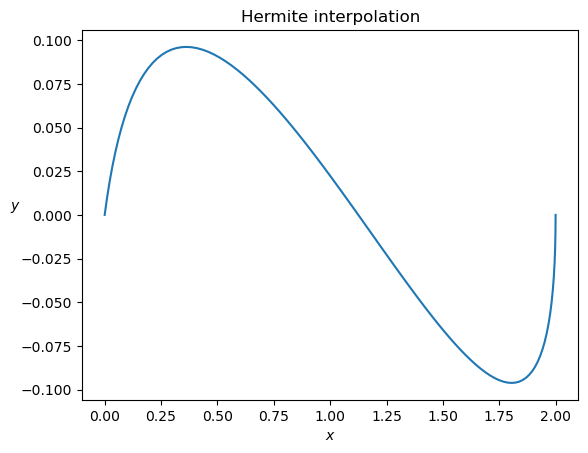

In [1]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([
	[0, 0],		# P0
	[2, 0]])	# P1
M = np.array([
	[1, 1],		# M0
	[0, 1]])	# M1
A = np.array([
	[0, 0, 0, 1],
	[1, 1, 1, 1],
	[0, 0, 1, 0],
	[3, 2, 1, 0]])

def Hermite_interpolation(P, M, A, t):
	T = np.array([t**3, t**2, t, 1])
	H = np.dot(np.transpose(np.linalg.inv(A)), T)
	return H[0] * P[0] + H[1] * P[1] + H[2] * M[0] + H[3] * M[1]

t_values = np.linspace(0, 1, 100)

curve = np.array([Hermite_interpolation(P, M, A, t) for t in t_values])

plt.plot(curve[:, 0], curve[:, 1])
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('Hermite interpolation')
plt.show()

**b**) Use the python script from a) to model the shape of the famous ``Swoosh`` (logo of the corporation Nike):
<p align="center" style="margin: 0; background-color: white; display: inline-block; padding: 10px; border-radius: 5px;">
  <img src="Logo_NIKE.png" alt="Nike Logo" style="width: 33%;">
  <br>
  <small><a href="https://en.wikipedia.org/wiki/Swoosh">https://en.wikipedia.org/wiki/Swoosh</a></small>
</p>
*Hint:* Use two different Hermite interpolated curves to model the shape.

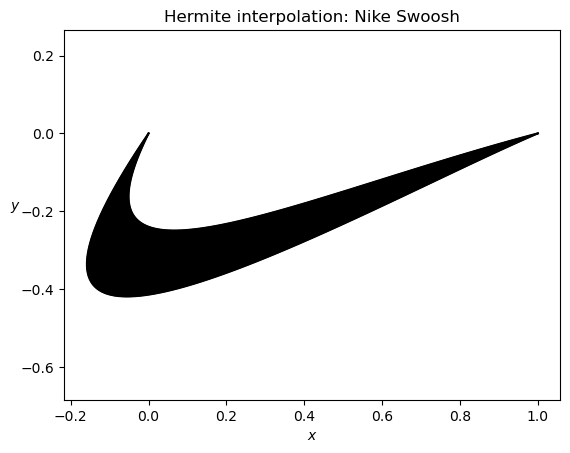

In [2]:
P = np.array([
	[0, 0],
	[1, 0]])
M1 = np.array([
    [-0.7, -1.4],
  	[1.9, 0.5]])
M2 = np.array([
    [-1.7, -2.5],
	[1.4, 0.6]])

curve1 = np.array([Hermite_interpolation(P, M1, A, t) for t in t_values])
curve2 = np.array([Hermite_interpolation(P, M2, A, t) for t in t_values])

plt.plot(curve1[:, 0], curve1[:, 1], color='k')
plt.plot(curve2[:, 0], curve2[:, 1], color='k')

polygon_points = np.vstack([curve1, curve2[::-1]])
plt.fill(polygon_points[:, 0], polygon_points[:, 1], color='k')

plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('Hermite interpolation: Nike Swoosh')
plt.axis('equal')
plt.show()

### Exercise 7.3 (3 points)

Given the four corner points $A, B, C, D \in \mathbb{E}^3$ of a tetrahedron with corresponding position vectors $\vec{a}, \vec{b}, \vec{c}, \vec{d} \in \mathbb{R}^3$. A point $P \in \mathbb{E}^3$ with position vector $\vec{p} \in \mathbb{R}^3$ can be represented using barycentric coordinates $\alpha_i, i =1, 2, 3, 4 $ as


$\vec{p} = \alpha_1 \vec{a} + \alpha_2 \vec{b} + \alpha_3 \vec{c} + \alpha_4 \vec{d}$,

where $\sum_{i=1}^4 \alpha_i= 1$. Show that barycentric coordinates $\vec{\alpha} = (\alpha_1, \alpha_2, \alpha_3)$ for a given point $P$ can be calculated using


$\vec{\alpha}=A^{-1}(\vec{p}-\vec{d})$

Determine the matrix $A$, dependent on the corners of the tetrahedron. Under which condition does this calculation fail? What does this mean for the tetrahedron?
	
	

Given that $\vec{p}=\alpha_1\vec{a}+\alpha_2\vec{b}+\alpha_3\vec{c}+\alpha_4\vec{d}$ and $\sum_{i=1}^4\alpha_i=1$, we can rewrite the equation as:

\begin{align*}
    \vec{p} &= \alpha_1\vec{a}+\alpha_2\vec{b}+\alpha_3\vec{c}+\alpha_4\vec{d} \\
    \vec{p} &= \alpha_1(\vec{a}-\vec{d})+\alpha_2(\vec{b}-\vec{d})+\alpha_3(\vec{c}-\vec{d})+\vec{d} \\
    \vec{p}-\vec{d} &= \alpha_1(\vec{a}-\vec{d})+\alpha_2(\vec{b}-\vec{d})+\alpha_3(\vec{c}-\vec{d}).
\end{align*}

This can be written in matrix form as:

\begin{align*}
    \begin{bmatrix}
        \vec{a}-\vec{d} & \vec{b}-\vec{d} & \vec{c}-\vec{d}
    \end{bmatrix}
    \begin{bmatrix}
        \alpha_1 \\ \alpha_2 \\ \alpha_3
    \end{bmatrix}
    &= \vec{p}-\vec{d} \\
    A\vec{\alpha} &= \vec{p}-\vec{d} \\
    \vec{\alpha} &= A^{-1}(\vec{p}-\vec{d}).
\end{align*}

If the matrix $A$ is singular, i.e. $\det(A)=0$, then the calculation fails. This means that the four vertices of the tetrahedron are coplanar.

<hr>

### Exercise 7.4 (3 points)

**Multiple Choice Questions:** Only one answer is correct. Please use a cross (☒) to mark the correct answer. A justification for the choice is not mandatory. Nevertheless, if you want to provide a justification, we highly appreciate it (use the space right next to it).

1. To exactly reproduce the function $f(x) = x^3 + 2x^2 - 7x + 5$ by Newton interpolation:
   - □ 3 sample pairs $(x_i,y_i)$ are needed at least.
   - ☒ 4 sample pairs $(x_i,y_i)$ are needed at least.
   - □ 5 sample pairs $(x_i,y_i)$ are needed at least.
   - □ The reconstruction will never be exact!

A polynomial of degree $n$ can be exactly reconstructed with $n+1$ sample points by Newton interpolation.

2. To exactly reproduce the function $f(x) = x^3 + 2\sin(x^2)$ by Newton interpolation:
   - □ 3 sample pairs $(x_i,y_i)$ are needed at least.
   - □ 4 sample pairs $(x_i,y_i)$ are needed at least.
   - □ 5 sample pairs $(x_i,y_i)$ are needed at least.
   - ☒ The reconstruction will never be exact!

Since the function contains a sine term, it is not a polynomial function. Therefore, it is not possible to exactly reproduce the function by Newton interpolation.

3. The following image illustrates nearest-neighbor, linear, and cubic interpolation in 1D and their extension to 2D. Use this visualization to find the wrong statement regarding these interpolation methods:  

<p align="center">
  <img src="Comparison_1D_and_2D_interpolation.png" alt="Comparison of 1D and 2D Interpolation" style="width: 68%;">
  <br>
  <small><a href="https://en.wikipedia.org/wiki/Bicubic_interpolation">https://en.wikipedia.org/wiki/Bicubic_interpolation</a> (CC BY-SA 4.0)</small>
</p>

   - □ If the 1D method needs \(N\) inputs (either sample points or derivatives), then the 2D method needs \(N^2\) inputs.
   - □ Bilinear interpolation can be expressed via three applications of linear interpolation.
   - ☒ The derivative of a linearly interpolated function is constant. The same holds for bilinearly interpolated functions, i.e., the derivative is a constant function.
   - □ The 2D nearest-neighbor interpolation leads to discontinuous solutions.

For each dimension, the bilinear interpolation can be expressed as a linear interpolation. The derivative of a linearly interpolated function is constant. However, when both coordinates vary, the partial derivatives depend on the other variable, making the overall two-dimensional derivative non-constant.

### Exercise 7.5 (3 points)

The following image (left) of the dog “Bailey” has only a resolution of 256 × 256.

<p align="center" style="margin: 0;">
  <img src="bailey_256_gray_with_zoom.png" alt="Image" style="width: 35%;">
</p>

The zoomed-in image (right) of one eye demonstrates the bad quality. Your task is to upscale the image to a resolution of 512 × 512. To do this, write a Python script that uses:

1. Nearest-neighbor interpolation
2. Bilinear interpolation
3. Bicubic interpolation

Compare the results of (1), (2), and (3) regarding quality (use zoomed-in areas).

**Hint:** Use the Python built-in function from the `scipy` library, such as `interp2`, which provides access to interpolation methods for 2D gridded data (see documentation).



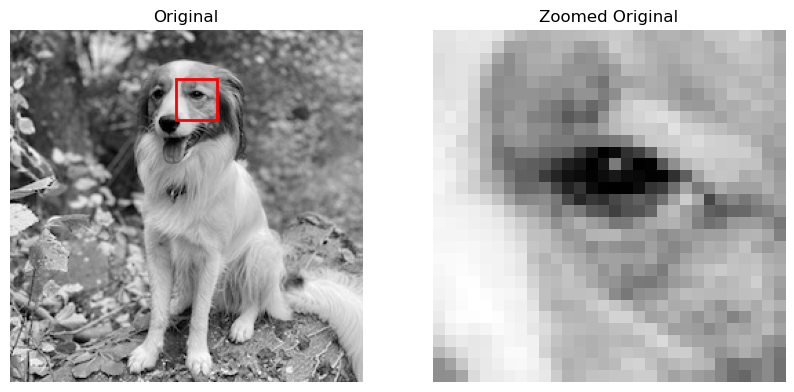

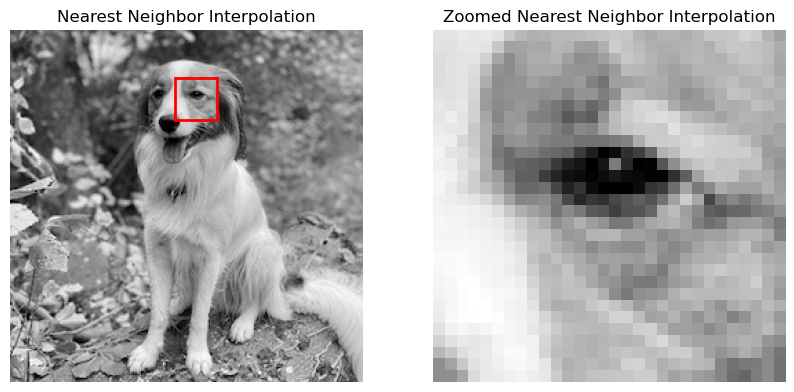

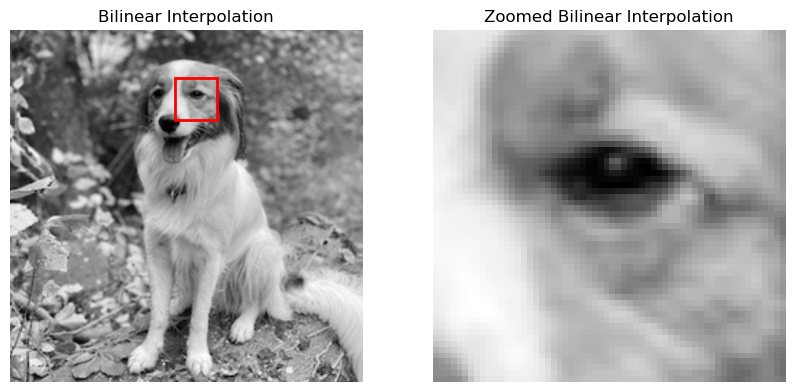

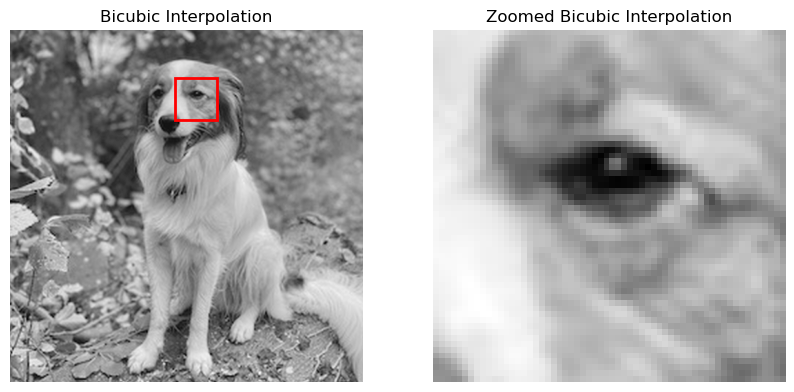

In [2]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.interpolate import interp2d
import warnings

warnings.filterwarnings('ignore')

RESOLUTION = 512

zoom_x = 35
zoom_y = 120
zoom_size = 30

methods = ['Original', 'Nearest Neighbor', 'Bilinear', 'Bicubic']

img = Image.open('bailey_256_gray.png')
img_array = np.array(img)

original_resolution = img_array.shape[0]

def nearest_neighbor_interpolation(img_array, resolution):
    new_img = np.zeros((resolution, resolution), dtype=np.uint8)

    for i in range(resolution):
        for j in range(resolution):
            x = int(i / resolution * img_array.shape[0])
            y = int(j / resolution * img_array.shape[1])
            new_img[i, j] = img_array[x, y]

    return new_img

def bilinear_interpolation(img, resolution):
    img = np.array(img)
    new_img = np.zeros((resolution, resolution), dtype=np.uint8)

    bilinear = interp2d(np.linspace(0, 1, img.shape[0]), 
                        np.linspace(0, 1, img.shape[1]), img, kind='linear')
    new_img = bilinear(np.linspace(0, 1, resolution), np.linspace(0, 1, resolution))

    return new_img

def bicubic_interpolation(img, resolution):
    img = np.array(img)
    new_img = np.zeros((resolution, resolution), dtype=np.uint8)

    bicubic = interp2d(np.linspace(0, 1, img.shape[0]), 
                       np.linspace(0, 1, img.shape[1]), img, kind='cubic')
    new_img = bicubic(np.linspace(0, 1, resolution), np.linspace(0, 1, resolution))

    return new_img

def plot(img, zoomed_img, method_str, zoom_x, zoom_y, zoom_size):
    plt.figure(figsize=(10, 10))

    ax1 = plt.subplot(121, title=method_str)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    rect = patches.Rectangle((zoom_y, zoom_x), zoom_size, zoom_size,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax1.add_patch(rect)

    plt.subplot(122, title='Zoomed ' + method_str)
    plt.imshow(zoomed_img, cmap='gray')
    plt.axis('off')

    plt.show()

for method in methods:
    if method == 'Original':
        result_img_array = img_array
        method_str = method
        zoom_x_new, zoom_y_new, zoom_size_new = zoom_x, zoom_y, zoom_size
    else:
        zoom_x_new = zoom_x * RESOLUTION // original_resolution
        zoom_y_new = zoom_y * RESOLUTION // original_resolution
        zoom_size_new = zoom_size * RESOLUTION // original_resolution
        if method == 'Nearest Neighbor':
            result_img_array = nearest_neighbor_interpolation(img_array, RESOLUTION)
            method_str = method + ' Interpolation'
        elif method == 'Bilinear':
            result_img_array = bilinear_interpolation(img_array, RESOLUTION)
            method_str = method + ' Interpolation'
        elif method == 'Bicubic':
            result_img_array = bicubic_interpolation(img_array, RESOLUTION)
            method_str = method + ' Interpolation'

    zoomed_img = result_img_array[zoom_x_new:zoom_x_new + zoom_size_new, 
                             zoom_y_new:zoom_y_new + zoom_size_new]
    
    plot(result_img_array, zoomed_img, method_str, zoom_x_new, zoom_y_new, zoom_size_new)

<hr>

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>